Desafio 39: Consumo de Energia Elétrica
📂 Dataset: Informações mensais de consumo de energia elétrica em diferentes bairros.
Colunas: ID, Bairro, Tipo_Consumidor, Consumo_kWh, Mês

🎯 Tarefas:

Corrija inconsistências no campo Tipo_Consumidor (ex: "residencial").

Trate o valor ausente em Consumo_kWh.

Qual o consumo médio de energia por tipo de consumidor?

Qual bairro teve maior consumo total no trimestre?

Crie um gráfico de barras mostrando o consumo médio por mês.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_39_consumo_energia.csv")
df.head()

,ID,Bairro,Tipo_Consumidor,Consumo_kWh,Mês
0,CE0001,Vila Esperança,Comercial,376.72,Março
1,CE0002,Vila Esperança,Comercial,475.93,Março
2,CE0003,Industrial,Poder Público,437.48,Janeiro
3,CE0004,Industrial,Comercial,527.78,Março
4,CE0005,Vila Esperança,Industrial,360.19,Janeiro


In [4]:
#Corrija inconsistências no campo Tipo_Consumidor (ex: "residencial").
df["Tipo_Consumidor"] = df["Tipo_Consumidor"].str.title()
df["Tipo_Consumidor"].unique()

array(['Comercial', 'Poder Público', 'Industrial', 'Residencial'],
      dtype=object)

In [9]:
#Trate o valor ausente em Consumo_kWh.
df["Consumo_kWh"] = pd.to_numeric(df["Consumo_kWh"], errors="coerce")
df["Consumo_kWh"] = df["Consumo_kWh"].fillna(
    df.groupby("Tipo_Consumidor")["Consumo_kWh"].transform("mean")
)
df["Consumo_kWh"].isna().sum()


0

In [11]:
#Qual o consumo médio de energia por tipo de consumidor?
consumoConsumidor = df.groupby("Tipo_Consumidor")["Consumo_kWh"].mean().round(2)
print(consumoConsumidor)

Tipo_Consumidor
Comercial        358.70
Industrial       346.38
Poder Público    364.68
Residencial      341.15
Name: Consumo_kWh, dtype: float64


In [17]:
#Qual bairro teve maior consumo total no trimestre?
bairroConsumo = df.groupby("Bairro")["Consumo_kWh"].sum().round(2)
print(f"O bairro com mais consumo foi: {bairroConsumo.idxmax()}({bairroConsumo.max()}kWh)")

O bairro com mais consumo foi: Industrial(30063.49kWh)


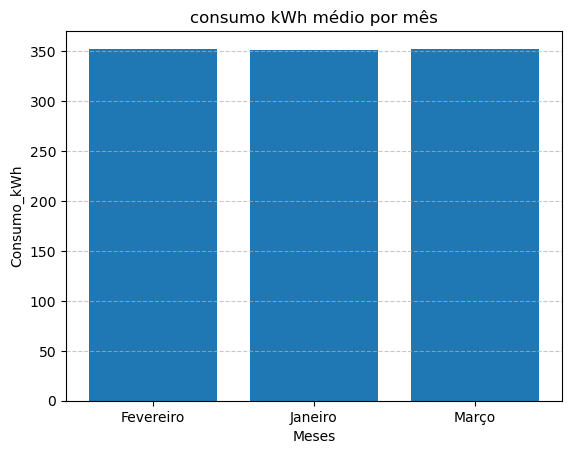

In [32]:
#Crie um gráfico de barras mostrando o consumo médio por mês.
consumoMes = df.groupby("Mês")["Consumo_kWh"].mean().round(2)

plt.bar(consumoMes.index, consumoMes.values)
plt.title("consumo kWh médio por mês")
plt.ylabel("Consumo_kWh")
plt.xlabel("Meses")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()